# Data ingestion and data processing pipelines

In [1]:
import cv2
import numpy as np
import bm3d
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
import matplotlib.pyplot as plt
import os


In [4]:
# def process_and_segment_image(image_path, save_dir="output"):
#     """
#     Processes and segments a melanoma image and saves each stage.
    
#     Parameters:
#         image_path (str): Path to the input image.
#         save_dir (str): Directory to save the output images.
    
#     Returns:
#         dict: Dictionary containing intermediate and final results:
#               - grayscale: Grayscale version of the image.
#               - denoised: Noise-reduced image using BM3D.
#               - binary_mass: Binary mass lesion image.
#               - binary_mask: Binary lesion mask formed by thresholding.
#               - morphed: Image after morphological operations.
#               - segmented: Final segmented image.
#     """
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)

#     # Load image
#     image = cv2.imread(image_path)
#     if image is None:
#         raise FileNotFoundError(f"Image not found at {image_path}")
    
#     # Resize to 256x256
#     resized_image = cv2.resize(image, (256, 256))
    
#     # Convert to grayscale
#     grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
#     cv2.imwrite(os.path.join(save_dir, "grayscale.png"), grayscale_image)
    
#     # Apply BM3D for noise reduction
#     denoised_image = bm3d.bm3d(grayscale_image, sigma_psd=15, stage_arg=bm3d.BM3DStages.ALL_STAGES)
#     cv2.imwrite(os.path.join(save_dir, "denoised.png"), (denoised_image * 255).astype(np.uint8))
    
#     # Binary lesion mass using thresholding
#     binary_mass = (denoised_image > threshold_otsu(denoised_image)).astype(np.uint8) * 255
#     cv2.imwrite(os.path.join(save_dir, "binary_mass.png"), binary_mass)
    
#     # Create binary lesion mask using maximum entropy thresholding
#     max_entropy_threshold = threshold_otsu(grayscale_image)
#     binary_mask = (grayscale_image > max_entropy_threshold).astype(np.uint8) * 255
#     cv2.imwrite(os.path.join(save_dir, "binary_mask.png"), binary_mask)
    
#     # Apply morphological operations
#     morphed_image = closing(binary_mask, square(3))
#     cv2.imwrite(os.path.join(save_dir, "morphed.png"), morphed_image)
    
#     # Create the segmented image
#     segmented_image = cv2.bitwise_and(grayscale_image, grayscale_image, mask=morphed_image)
#     cv2.imwrite(os.path.join(save_dir, "segmented.png"), segmented_image)
    
#     # Plot and save all stages
#     stages = {
#         "Grayscale": grayscale_image,
#         "Denoised": (denoised_image * 255).astype(np.uint8),
#         "Binary Mass": binary_mass,
#         "Binary Mask": binary_mask,
#         "Morphed": morphed_image,
#         "Segmented": segmented_image
#     }
    
#     fig, axes = plt.subplots(2, 3, figsize=(15, 10))
#     for ax, (title, img) in zip(axes.flatten(), stages.items()):
#         ax.imshow(img, cmap='gray')
#         ax.set_title(title)
#         ax.axis('off')
    
#     plt.tight_layout()
#     plt.savefig(os.path.join(save_dir, "processing_stages.png"))
#     plt.show()
    
#     return stages

# # Example usage
# image_path = os.path.join('..', 'artifacts', 'dataset', 'raw', 'train', 'malignant', 'melanoma_5003.jpg')
# process_and_segment_image(image_path, save_dir="output_images")


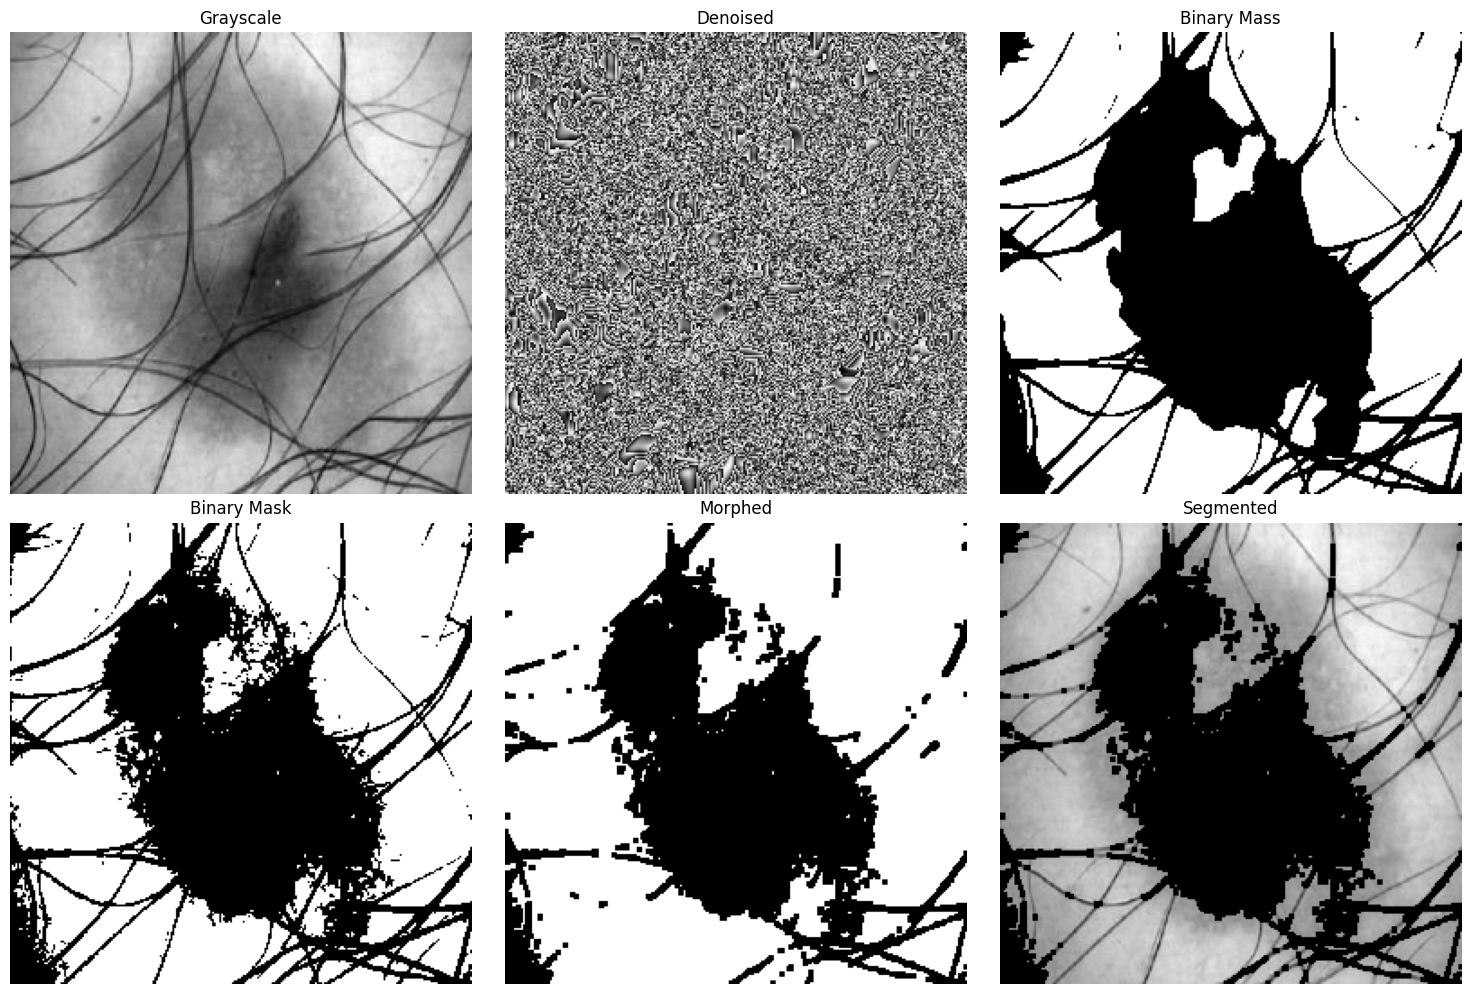

{'Grayscale': array([[106, 110, 114, ..., 123, 120, 120],
        [106, 110, 114, ..., 124, 121, 119],
        [107, 110, 114, ..., 126, 123, 121],
        ...,
        [ 72,  63,  58, ..., 114, 119, 122],
        [ 48,  61,  72, ..., 115, 118, 119],
        [ 58,  79,  90, ..., 118, 117, 115]], dtype=uint8),
 'Denoised': array([[146, 242, 115, ..., 103, 167, 244],
        [173,   4, 119, ..., 165,   3, 122],
        [231,  53, 144, ..., 212,  62, 209],
        ...,
        [ 82, 167, 148, ..., 251, 146,  22],
        [151,  71,   8, ..., 179, 215, 255],
        [237, 239,  63, ..., 132,  63, 110]], dtype=uint8),
 'Binary Mass': array([[  0,   0,   0, ..., 255, 255,   0],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 'Binary Mask': array([[  0,   0,   0, ..., 255,   0,   0],
      

In [3]:
# Example usage
image_path = os.path.join('..', 'artifacts', 'dataset', 'raw', 'train', 'malignant', 'melanoma_5011.jpg')
process_and_segment_image(image_path, save_dir="output_images")

In [15]:
def process_and_segment_image(image_path, save_dir="output"):
    """
    Processes and segments a melanoma image, isolates the masked area, its inverse, 
    applies Canny edge detection, and saves each stage.
    
    Parameters:
        image_path (str): Path to the input image.
        save_dir (str): Directory to save the output images.
    
    Returns:
        dict: Dictionary containing intermediate and final results:
              - grayscale: Grayscale version of the image.
              - denoised: Noise-reduced image using BM3D.
              - binary_mass: Binary mass lesion image.
              - binary_mask: Binary lesion mask formed by thresholding.
              - morphed: Image after morphological operations.
              - segmented: Final segmented image.
              - masked_area: ROI showing only the masked area of the image.
              - inverse_masked_area: Image showing everything except the masked area.
              - edges: Canny edge-detected image.
    """
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Resize to 256x256
    resized_image = cv2.resize(image, (256, 256))
    
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(os.path.join(save_dir, "grayscale.png"), grayscale_image)
    
    # Apply BM3D for noise reduction
    denoised_image = bm3d.bm3d(grayscale_image, sigma_psd=15, stage_arg=bm3d.BM3DStages.ALL_STAGES)
    cv2.imwrite(os.path.join(save_dir, "denoised.png"), (denoised_image * 255).astype(np.uint8))
    
    # Binary lesion mass using thresholding
    binary_mass = (denoised_image > threshold_otsu(denoised_image)).astype(np.uint8) * 255
    cv2.imwrite(os.path.join(save_dir, "binary_mass.png"), binary_mass)
    
    # Create binary lesion mask using maximum entropy thresholding
    max_entropy_threshold = threshold_otsu(grayscale_image)
    binary_mask = (grayscale_image > max_entropy_threshold).astype(np.uint8) * 255
    cv2.imwrite(os.path.join(save_dir, "binary_mask.png"), binary_mask)
    
    # Apply morphological operations
    morphed_image = closing(binary_mask, square(3))
    cv2.imwrite(os.path.join(save_dir, "morphed.png"), morphed_image)
    
    # Create the segmented image
    segmented_image = cv2.bitwise_and(grayscale_image, grayscale_image, mask=morphed_image)
    cv2.imwrite(os.path.join(save_dir, "segmented.png"), segmented_image)
    
    # Extract only the masked area
    masked_area = cv2.bitwise_and(resized_image, resized_image, mask=morphed_image)
    cv2.imwrite(os.path.join(save_dir, "masked_area.png"), masked_area)
    
    # Extract the inverse of the masked area
    inverse_mask = cv2.bitwise_not(morphed_image)  # Invert the mask
    inverse_masked_area = cv2.bitwise_and(resized_image, resized_image, mask=inverse_mask)
    cv2.imwrite(os.path.join(save_dir, "inverse_masked_area.png"), inverse_masked_area)
    
    # Apply Canny edge detection
    edges = cv2.Canny(inverse_masked_area, threshold1=50, threshold2=150)
    cv2.imwrite(os.path.join(save_dir, "edges.png"), edges)
    
    # Plot and save all stages
    stages = {
        "Grayscale": grayscale_image,
        "Denoised": (denoised_image * 255).astype(np.uint8),
        "Binary Mass": binary_mass,
        "Binary Mask": binary_mask,
        "Morphed": morphed_image,
        "Segmented": segmented_image,
        "Masked Area": cv2.cvtColor(masked_area, cv2.COLOR_BGR2RGB),  # Convert BGR to RGB
        "Inverse Masked Area": cv2.cvtColor(inverse_masked_area, cv2.COLOR_BGR2RGB),
        "Edges": edges
    }
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    for ax, (title, img) in zip(axes.flatten(), stages.items()):
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        ax.set_title(title)
        ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "processing_stages.png"))
    plt.show()
    
    return stages

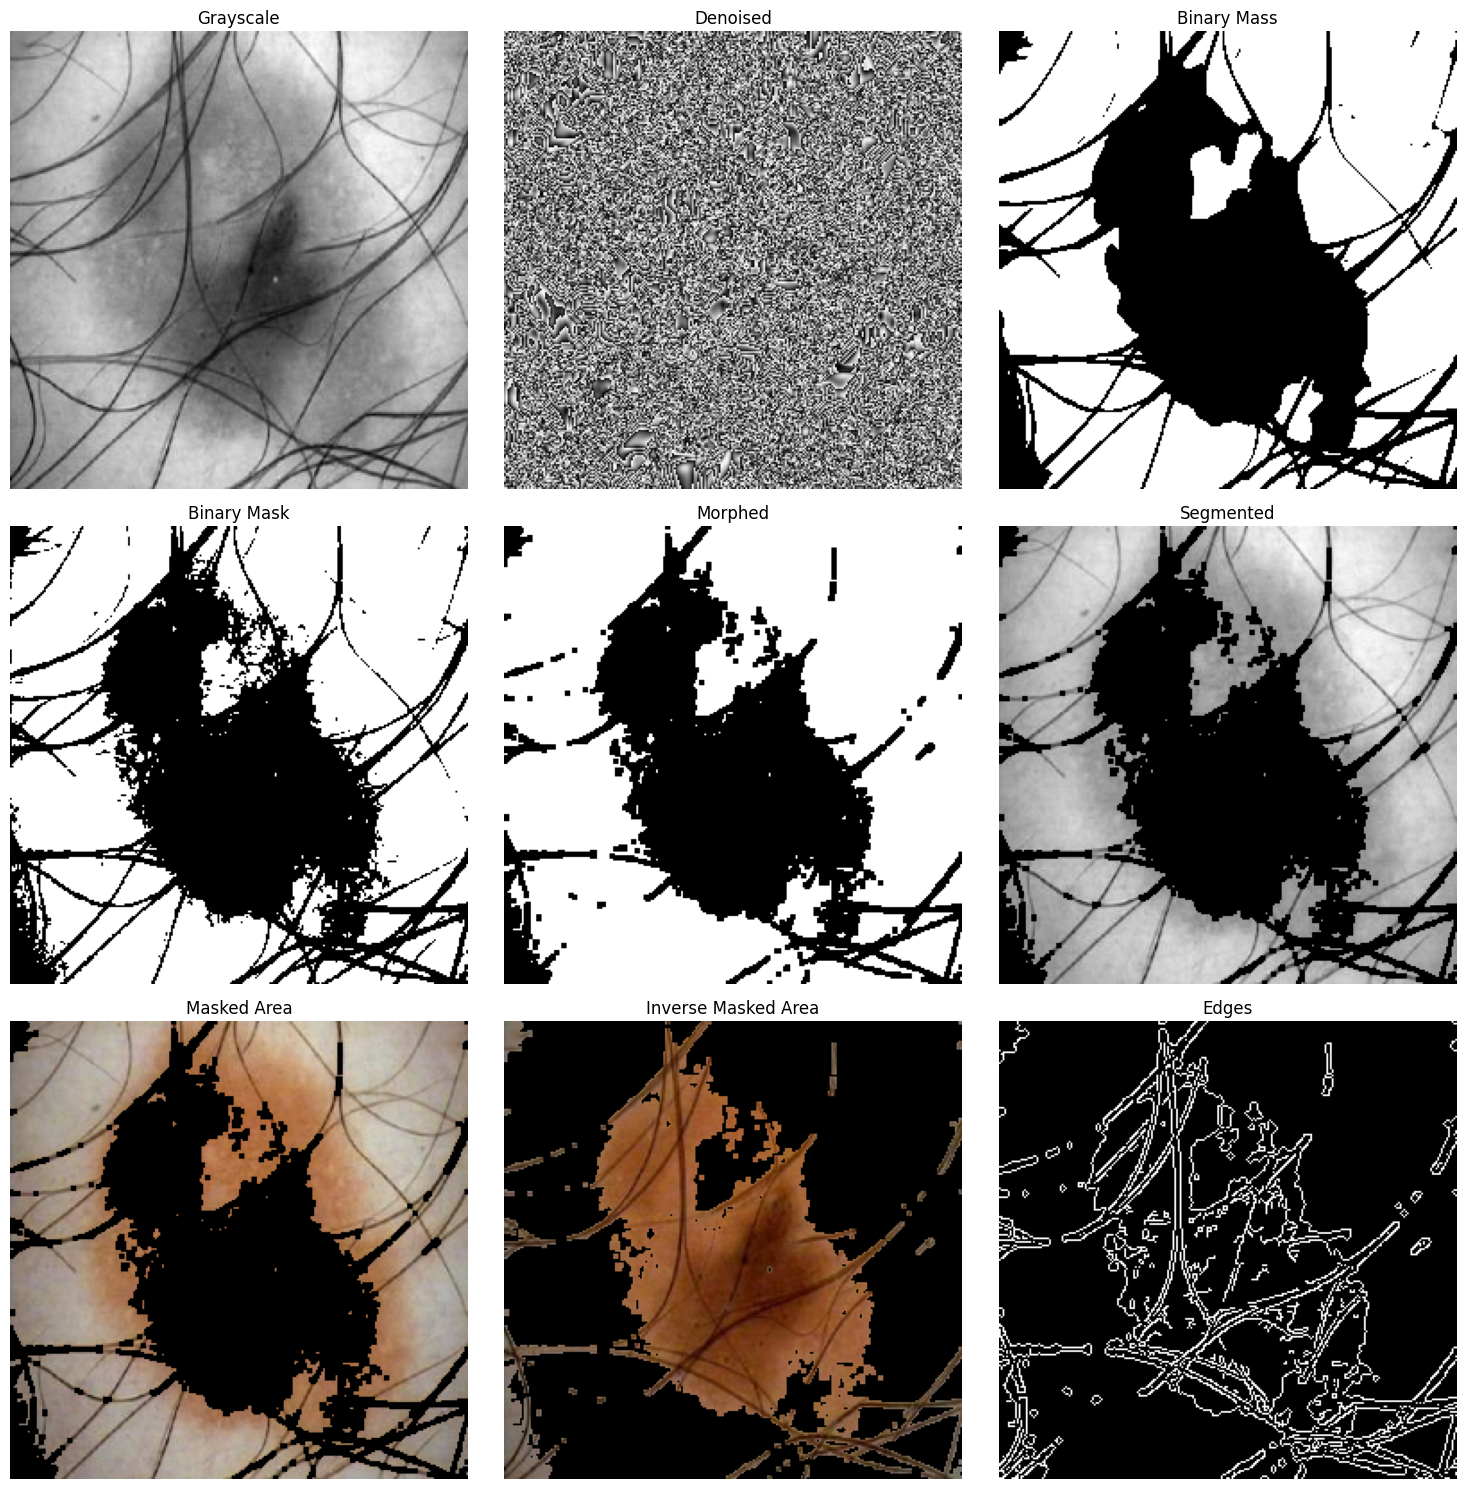

{'Grayscale': array([[106, 110, 114, ..., 123, 120, 120],
        [106, 110, 114, ..., 124, 121, 119],
        [107, 110, 114, ..., 126, 123, 121],
        ...,
        [ 72,  63,  58, ..., 114, 119, 122],
        [ 48,  61,  72, ..., 115, 118, 119],
        [ 58,  79,  90, ..., 118, 117, 115]], dtype=uint8),
 'Denoised': array([[146, 242, 115, ..., 103, 167, 244],
        [173,   4, 119, ..., 165,   3, 122],
        [231,  53, 144, ..., 212,  62, 209],
        ...,
        [ 82, 167, 148, ..., 251, 146,  22],
        [151,  71,   8, ..., 179, 215, 255],
        [237, 239,  63, ..., 132,  63, 110]], dtype=uint8),
 'Binary Mass': array([[  0,   0,   0, ..., 255, 255,   0],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 'Binary Mask': array([[  0,   0,   0, ..., 255,   0,   0],
      

In [16]:
# Example usage
image_path = os.path.join('..', 'artifacts', 'dataset', 'raw', 'train', 'malignant', 'melanoma_5011.jpg')
process_and_segment_image(image_path, save_dir="output_images")

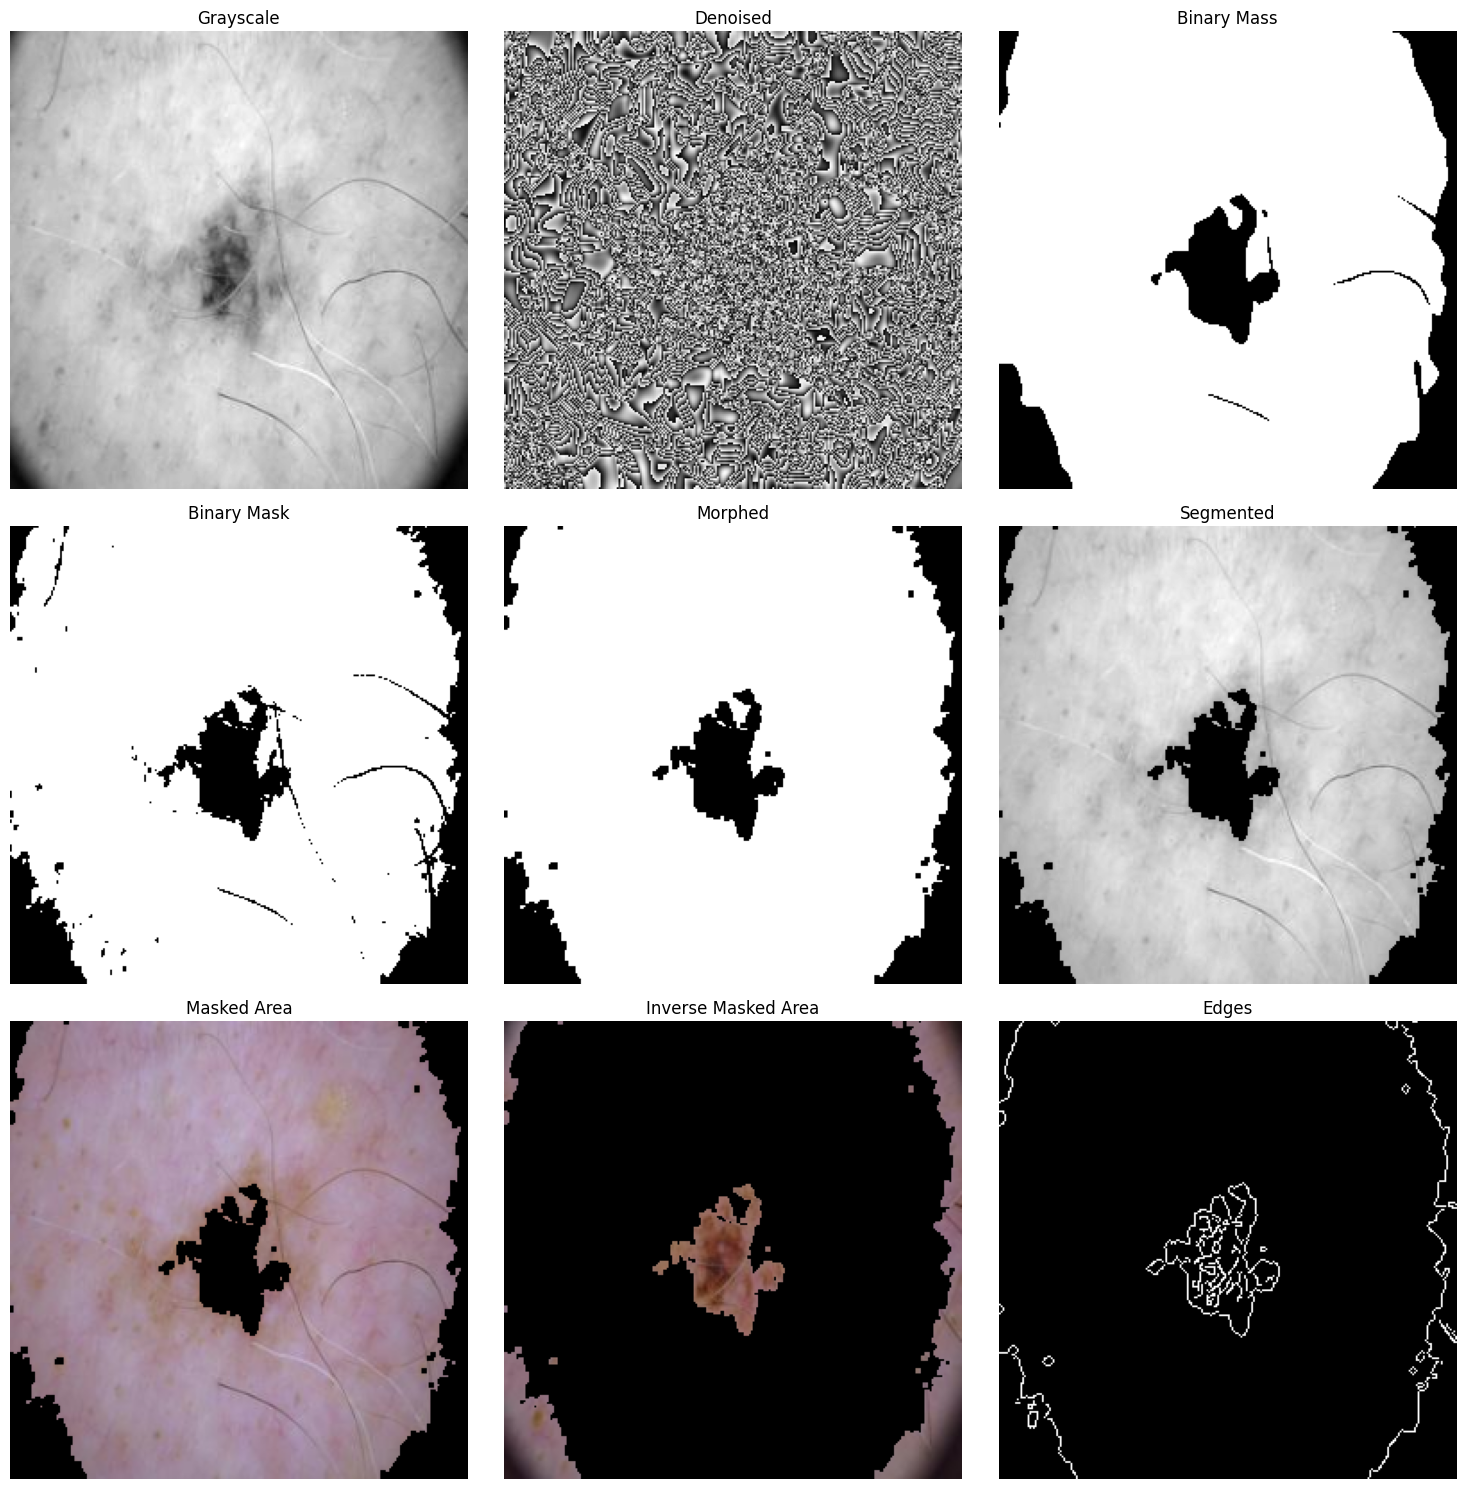

{'Grayscale': array([[42, 49, 59, ..., 28, 26, 26],
        [47, 53, 63, ..., 28, 26, 26],
        [53, 59, 68, ..., 28, 26, 25],
        ...,
        [29, 29, 27, ..., 24, 24, 24],
        [29, 29, 28, ..., 24, 24, 24],
        [30, 29, 28, ..., 24, 24, 24]], dtype=uint8),
 'Denoised': array([[106, 199,  87, ...,  10, 100, 238],
        [195, 217, 149, ..., 200, 226,  21],
        [ 80, 135,  41, ..., 204, 183, 116],
        ...,
        [229,  92, 113, ..., 126, 122, 116],
        [226,  91,  94, ..., 123, 117, 109],
        [149,  21,  24, ..., 115, 106,  97]], dtype=uint8),
 'Binary Mass': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Binary Mask': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0,

In [17]:
# Example usage
image_path = os.path.join('..', 'artifacts', 'dataset', 'raw', 'train', 'malignant', 'melanoma_5010.jpg')
process_and_segment_image(image_path, save_dir="output_images")

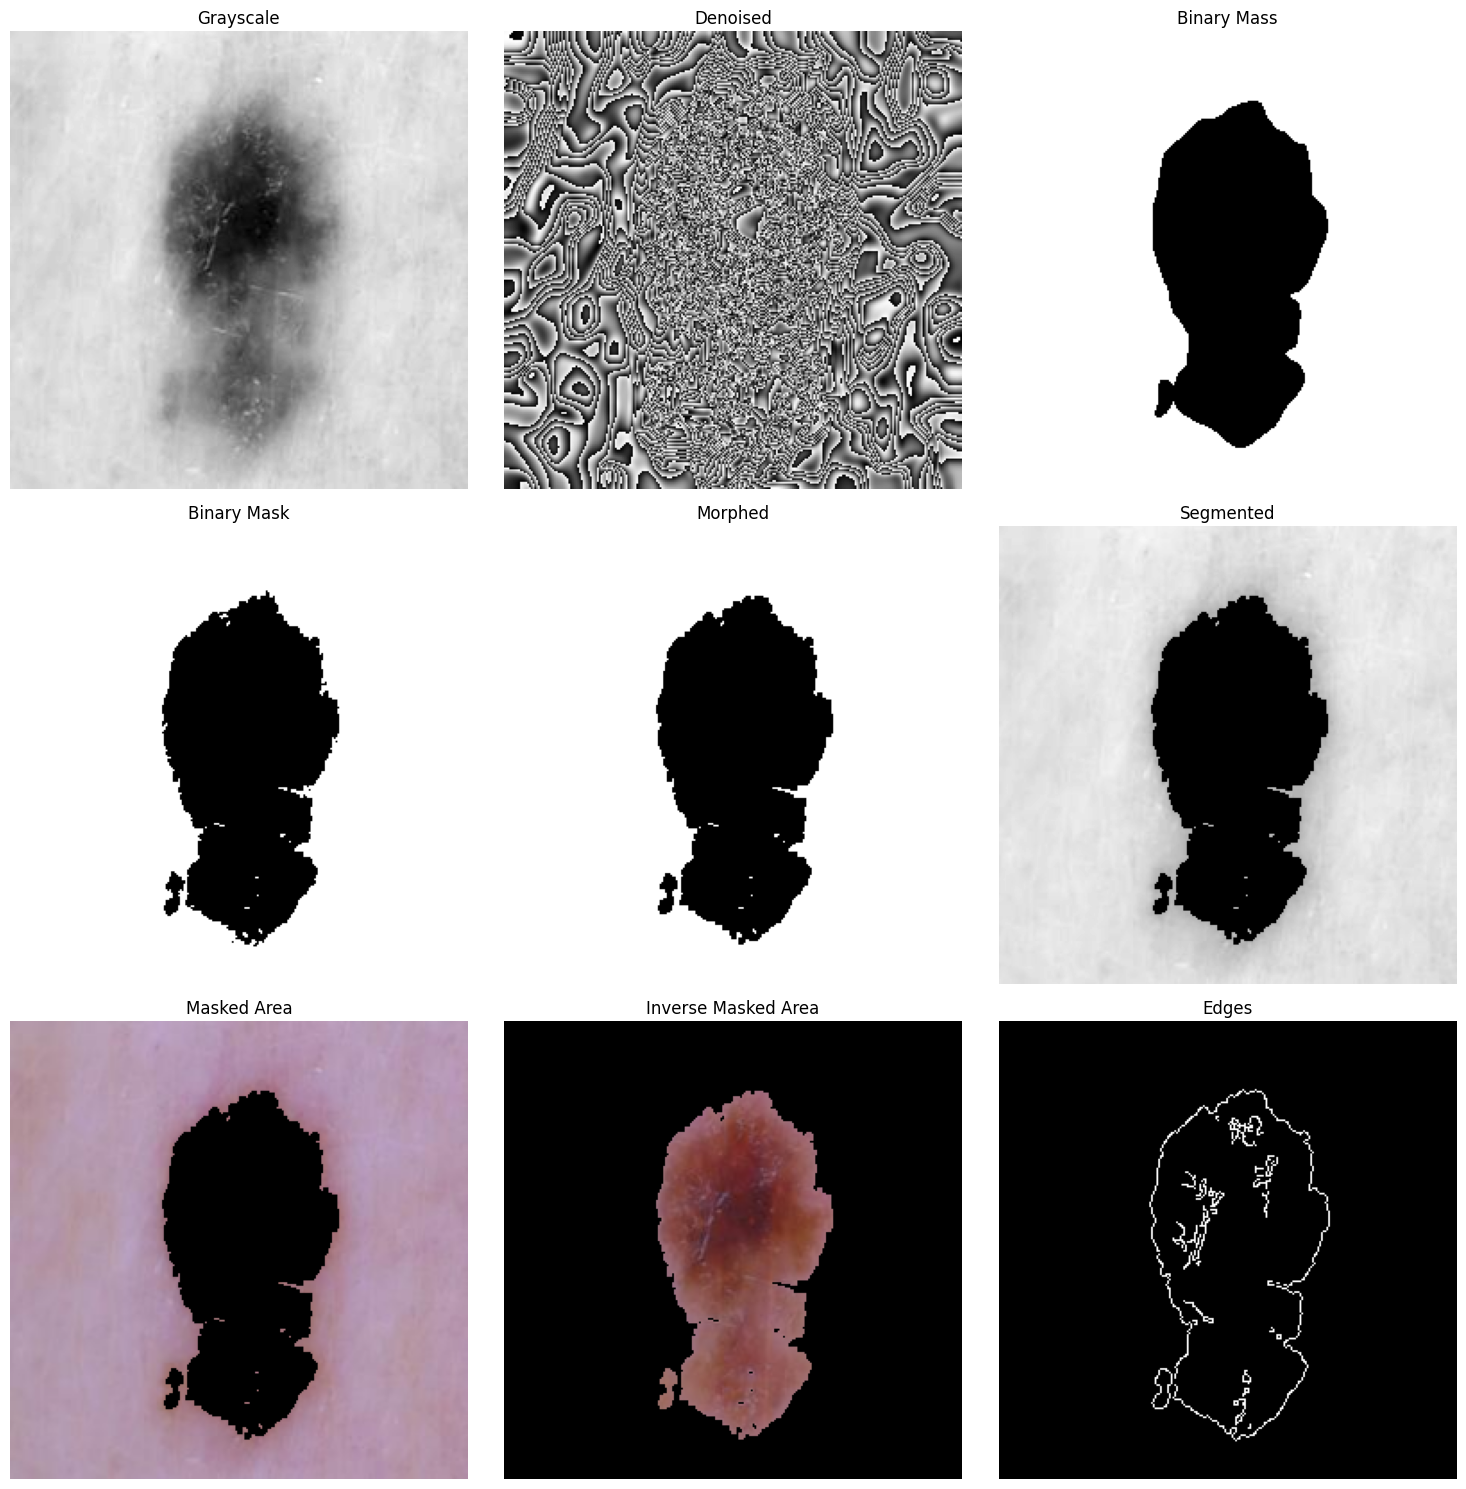

{'Grayscale': array([[159, 160, 161, ..., 167, 166, 165],
        [160, 160, 161, ..., 167, 165, 164],
        [161, 161, 162, ..., 166, 164, 163],
        ...,
        [164, 163, 162, ..., 154, 154, 155],
        [164, 163, 161, ..., 154, 154, 155],
        [164, 163, 161, ..., 154, 154, 155]], dtype=uint8),
 'Denoised': array([[249, 250, 252, ...,  89,  87,  85],
        [251, 252, 253, ...,  87,  85,  82],
        [254, 254, 255, ...,  77,  75,  71],
        ...,
        [ 47,  44,  41, ..., 178, 183, 186],
        [ 42,  41,  39, ..., 178, 183, 187],
        [ 41,  39,  37, ..., 179, 184, 189]], dtype=uint8),
 'Binary Mass': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 'Binary Mask': array([[255, 255, 255, ..., 255, 255, 255],
      

In [18]:
# Example usage
image_path = os.path.join('..', 'artifacts', 'dataset', 'raw', 'train', 'malignant', 'melanoma_5003.jpg')
process_and_segment_image(image_path, save_dir="output_images")